## Customer-Service-Request-Analysis

In [98]:
!python --version

Python 3.10.5


In [7]:
import numpy as np
import pandas as pd

##### Import a 311 NYC service request.

In [8]:
data =pd.read_csv('311_Service_Requests_from_2010_to_Present.csv')
# To Read Top 3 records
data.head()

C:\Users\abman\AppData\Local\Temp\ipykernel_11320\1797725720.py:1: DtypeWarning: Columns (48,49) have mixed types. Specify dtype option on import or set low_memory=False.
  data =pd.read_csv('311_Service_Requests_from_2010_to_Present.csv')


,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01-01-16 0:55,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01-01-16 1:26,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01-01-16 4:51,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01-01-16 7:43,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01-01-16 3:24,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


In [9]:
## check columns names 
data.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'School or Citywide Complaint',
       'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment', 'Garage Lot Name', 'Ferry 

In [10]:
# Check shape of DataFrame
data.shape

(300698, 53)

In [11]:
#To get nan values 
data.isnull().sum()

Unique Key                             0
Created Date                           0
Closed Date                         2164
Agency                                 0
Agency Name                            0
Complaint Type                         0
Descriptor                          5914
Location Type                        131
Incident Zip                        2615
Incident Address                   44410
Street Name                        44410
Cross Street 1                     49279
Cross Street 2                     49779
Intersection Street 1             256840
Intersection Street 2             257336
Address Type                        2815
City                                2614
Landmark                          300349
Facility Type                       2171
Status                                 0
Due Date                               3
Resolution Description                 0
Resolution Action Updated Date      2187
Community Board                        0
Borough         

In [12]:
# As we seen Closed Date is important column and have many missing values
data[data['Closed Date'].isnull()]

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
416,32305700,12/31/2015 02:16:04 PM,NaN,NYPD,New York City Police Department,Illegal Parking,Posted Parking Sign Violation,Street/Sidewalk,NaN,5426-5526 90TH ST,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
611,32309308,12/31/2015 09:58:06 AM,NaN,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,NaN,30 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1648,32303348,12/30/2015 05:13:42 AM,NaN,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,NaN,21600-2169 91ST AVE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1816,32294519,12/29/2015 10:44:50 PM,NaN,NYPD,New York City Police Department,Derelict Vehicle,With License Plate,Street/Sidewalk,NaN,127 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1965,32296487,12/29/2015 07:09:13 PM,NaN,NYPD,New York City Police Department,Derelict Vehicle,With License Plate,Street/Sidewalk,NaN,5201-5299 68TH ST,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300273,30287350,03/29/2015 02:40:19 PM,NaN,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,NaN,3801-3999 23RD AVE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
300492,30284963,03/29/2015 08:50:15 AM,NaN,NYPD,New York City Police Department,Vending,Unlicensed,Street/Sidewalk,NaN,COOPER AVE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
300496,30285492,03/29/2015 08:44:13 AM,NaN,NYPD,New York City Police Department,Vending,Unlicensed,Street/Sidewalk,NaN,80 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
300620,30282717,03/29/2015 01:55:35 AM,NaN,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,NaN,CRESCENT AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
# We check data type of each column
data.dtypes

Unique Key                          int64
Created Date                       object
Closed Date                        object
Agency                             object
Agency Name                        object
Complaint Type                     object
Descriptor                         object
Location Type                      object
Incident Zip                      float64
Incident Address                   object
Street Name                        object
Cross Street 1                     object
Cross Street 2                     object
Intersection Street 1              object
Intersection Street 2              object
Address Type                       object
City                               object
Landmark                           object
Facility Type                      object
Status                             object
Due Date                           object
Resolution Description             object
Resolution Action Updated Date     object
Community Board                   

### Read or convert the columns ‘Created Date’ and Closed Date’ to datetime datatype and create a new column ‘Request_Closing_Time’ as the time elapsed between request creation and request closing.

In [15]:
import datetime as dt
import time, datetime


# Convert "Closed Date" to datetime dtype
data['Closed Date'] = pd.to_datetime(data['Closed Date'])
data['Closed Date'].dtype
data['Created Date'] = pd.to_datetime(data['Created Date'])
data['Created Date'].dtype

# Create new column Request_Closing_Time with time taken to close complain
data['Request_Closing_Time'] = data['Closed Date'] - data['Created Date']

data['Request_Closing_Time'].head()

0   0 days 00:55:15
1   0 days 01:26:16
2   0 days 04:51:31
3   0 days 07:45:14
4   0 days 03:27:02
Name: Request_Closing_Time, dtype: timedelta64[ns]

### Provide major insights/patterns that you can offer in a visual format (graphs or tables); at least 4 major conclusions that you can come up with after generic data mining

#### Insight - 1

In [16]:

# Check count in each complain type - sorted decreasing order
data['Complaint Type'].value_counts()

Blocked Driveway             77044
Illegal Parking              75361
Noise - Street/Sidewalk      48612
Noise - Commercial           35577
Derelict Vehicle             17718
Noise - Vehicle              17083
Animal Abuse                  7778
Traffic                       4498
Homeless Encampment           4416
Noise - Park                  4042
Vending                       3802
Drinking                      1280
Noise - House of Worship       931
Posting Advertisement          650
Urinating in Public            592
Bike/Roller/Skate Chronic      427
Panhandling                    307
Disorderly Youth               286
Illegal Fireworks              168
Graffiti                       113
Agency Issues                    6
Squeegee                         4
Ferry Complaint                  2
Animal in a Park                 1
Name: Complaint Type, dtype: int64

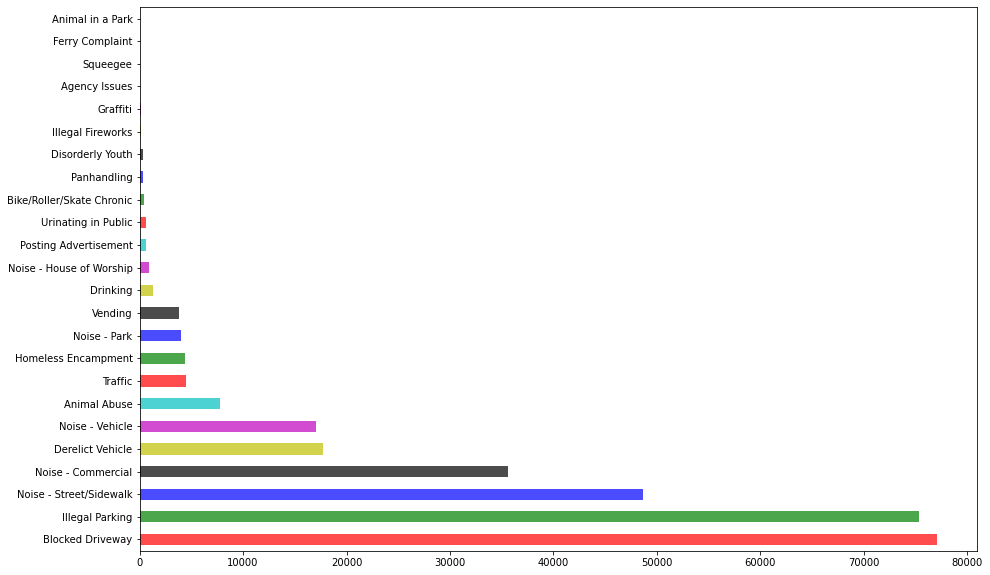

In [17]:
#Import required libraries
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

# Create Bar plot for complain type to check frequency in Complain Type
data['Complaint Type'].value_counts().plot(kind="barh", color=list('rgbkymc'), alpha=0.7, figsize=(15,10))
plt.show()

#### Insight 2

In [19]:

# Let's check count for status type
data['Status'].value_counts()

Closed      298471
Open          1439
Assigned       786
Draft            2
Name: Status, dtype: int64

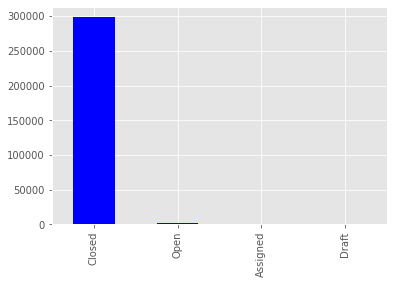

In [104]:
# Draw Bar lot for Status for color = rgbkymc
from matplotlib import style
style.use('ggplot')
data['Status'].value_counts().plot(kind='bar', color=list('b'))
plt.show()# Insight 3

#### Insight 3

In [22]:

## counts complaints type group by city and complaints Type
complaintTypecity = pd.DataFrame({'count':
                                  data.groupby(['Complaint Type','City']).size()}).reset_index()
complaintTypecity.head(2)

,Complaint Type,City,count
0,Animal Abuse,ARVERNE,38
1,Animal Abuse,ASTORIA,125


#### Insight 4

In [23]:
##  To check with Month have Complain creation most and least

# Created Series for months in text format
monthSeries = pd.Series({1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'})
print(monthSeries)
print(monthSeries[12])

1     Jan
2     Feb
3     Mar
4     Apr
5     May
6     Jun
7     Jul
8     Aug
9     Sep
10    Oct
11    Nov
12    Dec
dtype: object
Dec


In [24]:
import datetime as dt
import time, datetime
data['Created Date'].dtype

# Function to fetch month from Created Date column

def getMonth(cDate):
    a = str(cDate)
    datee = datetime.datetime.strptime(a, "%Y-%m-%d %H:%M:%S")
    return monthSeries[datee.month]

# Test function getMonth
print(data['Created Date'][0])
print(getMonth(data['Created Date'][0]))

2015-12-31 23:59:45
Dec


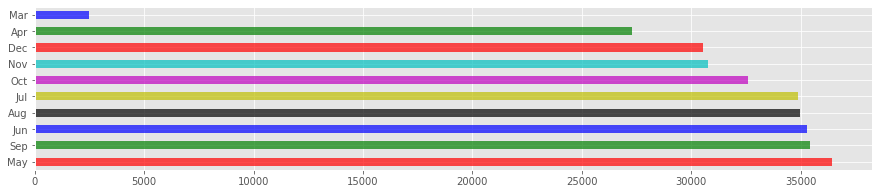

In [25]:
# Created new column Created_Month and kept all text format months in that column

data['Created_Month'] = data['Created Date'].apply(getMonth)
data['Created_Month'].value_counts()
# Create Bar plot for Complain Created Month to check frequency and it prove Most count is in May month and least is in March and in January there is no any complain
data['Created_Month'].value_counts().plot(kind="barh", color=list('rgbkymc'), alpha=0.7, figsize=(15,3))
plt.show()

#### Insight 5

In [26]:
## Categorize Request_Closing_Time as follows -
# Below 2 hours - Fast, Between 2 to 4 hours - Acceptable, Between 4 to 6 - Slow, More than 6 hours - Very Slow
# For this, first will create new column Request_Closing_In_Hr and then create new column - Request_Closing_Time_Category

# Function to convert TimeDelta in Hour
def toHr(timeDel):
    days = timeDel.days
    hours = round(timeDel.seconds/3600, 2)
    result = (days * 24) + hours
    #print(days)
    #print(hours)
    return result
    #return round(pd.Timedelta(timeDel).seconds / 3600, 2)
    # Testing of function with days


In [27]:
# Apply this function to every row of column Request_Closing_Time
data['Request_Closing_In_Hr'] = data['Request_Closing_Time'].apply(toHr)

data['Request_Closing_In_Hr'].head()

0    0.92
1    1.44
2    4.86
3    7.75
4    3.45
Name: Request_Closing_In_Hr, dtype: float64

In [28]:
import math
# Function to categorize hours - Less than 2 hours - Fast, Between 2 to 4 hours - Acceptable, Between 4 to 6 - Slow, More than 6 hours - Very Slow
def hrToCategory(hr):
    if (math.isnan(hr)):
        return 'Unspecified'
    elif (hr < 2.0):
        return 'Fast'
    elif (4.0 > hr >= 2.0):
        return 'Acceptable'
    elif (6.0 > hr >= 4.0):
        return 'Slow'
    else:
        return 'Very Slow'

# Testing function
print(hrToCategory(1.99))

# Create new column Request_Closing_Time_Category and apply function on column Request_Closing_In_Hr

data['Request_Closing_Time_Category'] = data['Request_Closing_In_Hr'].apply(hrToCategory)

data['Request_Closing_Time_Category'].head()

Fast


0          Fast
1          Fast
2          Slow
3     Very Slow
4    Acceptable
Name: Request_Closing_Time_Category, dtype: object

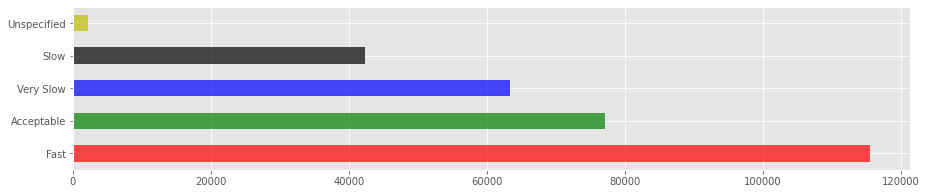

In [29]:
#Import required libraries
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
data['Request_Closing_Time_Category'].value_counts()

# Create Bar plot for Request_Closing_Time_Category to check frequency in Request_Closing_Time_Category and it prove Most count is in Fast category means closed less than 2 hours
data['Request_Closing_Time_Category'].value_counts().plot(kind="barh", color=list('rgbkymc'), alpha=0.7, figsize=(15,3))
plt.show()

In [30]:
data['Descriptor'].unique()

array(['Loud Music/Party', 'No Access', 'Commercial Overnight Parking',
       'Blocked Sidewalk', 'Posted Parking Sign Violation',
       'Blocked Hydrant', 'With License Plate', 'Partial Access',
       'Unauthorized Bus Layover', 'Double Parked Blocking Vehicle',
       'Double Parked Blocking Traffic', 'Vehicle', 'Loud Talking',
       'Banging/Pounding', 'Car/Truck Music', 'Tortured',
       'In Prohibited Area', 'Congestion/Gridlock', 'Neglected',
       'Car/Truck Horn', 'In Public', 'Other (complaint details)', nan,
       'No Shelter', 'Truck Route Violation', 'Unlicensed',
       'Overnight Commercial Storage', 'Engine Idling',
       'After Hours - Licensed Est', 'Detached Trailer',
       'Underage - Licensed Est', 'Chronic Stoplight Violation',
       'Loud Television', 'Chained', 'Building', 'In Car',
       'Police Report Requested', 'Chronic Speeding',
       'Playing in Unsuitable Place', 'Drag Racing',
       'Police Report Not Requested', 'Nuisance/Truant', 'Homeless

In [31]:
complaintTypecity = pd.DataFrame({'Total Number':
                                  data.groupby(['Complaint Type','Descriptor']).size()})
complaintTypecity

Total Number
Complaint Type           Descriptor                                  
Agency Issues            Language Access Complaint                  6
Animal Abuse             Chained                                  535
                         In Car                                   251
                         Neglected                               3787
                         No Shelter                               382
                         Other (complaint details)               1969
                         Tortured                                 854
Animal in a Park         Animal Waste                               1
Blocked Driveway         No Access                              56976
                         Partial Access                         20068
Derelict Vehicle         With License Plate                     17718
Disorderly Youth         Nuisance/Truant                           41
                         Playing in Unsuitable Place              245
Drinking                 After Hours - Licensed Est                77
                         In Public                                932
                         Underage - Licensed Est                  271
Ferry Complaint          Disruptive Passenger                       1
                         Homeless Issue                             1
Graffiti                 Police Report Not Requested               23
                         Police Report Requested                   90
Illegal Parking          Blocked Hydrant                        16081
                         Blocked Sidewalk                       11121
                         Commercial Overnight Parking           12189
                         Detached Trailer                         464
                         Double Parked Blocking Traffic          5731
                         Double Parked Blocking Vehicle          4211
                         Overnight Commercial Storage            1757
                         Posted Parking Sign Violation          22440
                         Unauthorized Bus Layover                1367
Noise - Commercial       Banging/Pounding                        3917
                         Car/Truck Horn                           991
                         Car/Truck Music                          899
                         Loud Music/Party                       25787
                         Loud Talking                            3891
                         Loud Television                           92
Noise - House of Worship Banging/Pounding                         248
                         Loud Music/Party                         504
                         Loud Talking                             178
                         Loud Television                            1
Noise - Park             Loud Music/Party                        3109
                         Loud Talking                             933
Noise - Street/Sidewalk  Loud Music/Party                       32030
                         Loud Talking                           16582
Noise - Vehicle          Car/Truck Horn                          2520
                         Car/Truck Music                        10374
                         Engine Idling                           4189
Posting Advertisement    Building                                  60
                         Vehicle                                  590
Traffic                  Chronic Speeding                         268
                         Chronic Stoplight Violation              280
                         Congestion/Gridlock                     2761
                         Drag Racing                              175
                         Truck Route Violation                   1014
Vending                  In Prohibited Area                      2025
                         Unlicensed                              1777

### Order the complaint types based on the average ‘Request_Closing_Time’, grouping them for different locations.

In [39]:
# For location we can choose here City, so first check if there is missing values there
data['City'].isnull().sum()
# Fill all missing values
data['City'].fillna('Not Available', inplace=True)
data['City'].head(1)

0    NEW YORK
Name: City, dtype: object

In [40]:
# Group them for City then Complain Type
data_grouped = data.groupby(['City', 'Complaint Type'])
# get average and get Request_Closing_Time column 
data_mean = data_grouped.mean()['Request_Closing_In_Hr']
data_mean.isnull().sum()

4

In [41]:
# Group by City first & then Complain Type and showing average of Request Closing in Hour
data_grouped = data.groupby(['City','Complaint Type']).agg({'Request_Closing_In_Hr': 'mean'})
data_grouped

Request_Closing_In_Hr
City     Complaint Type                                
ARVERNE  Animal Abuse                          2.153158
         Blocked Driveway                      2.526000
         Derelict Vehicle                      2.968889
         Disorderly Youth                      3.595000
         Drinking                              0.240000
...                                                 ...
Woodside Blocked Driveway                      6.405455
         Derelict Vehicle                      4.965000
         Illegal Parking                       5.219500
         Noise - Commercial                    2.390000
         Noise - Street/Sidewalk               3.410000

[782 rows x 1 columns]

In [42]:
# Check if any value is null
data_grouped[data_grouped['Request_Closing_In_Hr'].isnull()]

Request_Closing_In_Hr
City          Complaint Type                                 
Not Available Ferry Complaint                             NaN
              Noise - House of Worship                    NaN
              Panhandling                                 NaN
              Posting Advertisement                       NaN

In [43]:
# Check total rows
print(data_grouped)

                                  Request_Closing_In_Hr
City     Complaint Type                                
ARVERNE  Animal Abuse                          2.153158
         Blocked Driveway                      2.526000
         Derelict Vehicle                      2.968889
         Disorderly Youth                      3.595000
         Drinking                              0.240000
...                                                 ...
Woodside Blocked Driveway                      6.405455
         Derelict Vehicle                      4.965000
         Illegal Parking                       5.219500
         Noise - Commercial                    2.390000
         Noise - Street/Sidewalk               3.410000

[782 rows x 1 columns]


In [44]:
# drop null values from this group
data_grouped_withoutna = data_grouped.dropna()
# verify if new group has null values
data_grouped_withoutna.isnull().sum()

Request_Closing_In_Hr    0
dtype: int64

In [45]:
# verify number of rows after dropping null values
print(data_grouped_withoutna)

                                  Request_Closing_In_Hr
City     Complaint Type                                
ARVERNE  Animal Abuse                          2.153158
         Blocked Driveway                      2.526000
         Derelict Vehicle                      2.968889
         Disorderly Youth                      3.595000
         Drinking                              0.240000
...                                                 ...
Woodside Blocked Driveway                      6.405455
         Derelict Vehicle                      4.965000
         Illegal Parking                       5.219500
         Noise - Commercial                    2.390000
         Noise - Street/Sidewalk               3.410000

[778 rows x 1 columns]


In [46]:
# Sorting by column - Request_Closing_In_Hr for City on grouped
data_sorted = data_grouped_withoutna.sort_values(['City', 'Request_Closing_In_Hr'])
data_sorted

Request_Closing_In_Hr
City     Complaint Type                                
ARVERNE  Drinking                              0.240000
         Vending                               0.480000
         Urinating in Public                   0.690000
         Panhandling                           1.030000
         Noise - Park                          1.285000
...                                                 ...
Woodside Noise - Commercial                    2.390000
         Noise - Street/Sidewalk               3.410000
         Derelict Vehicle                      4.965000
         Illegal Parking                       5.219500
         Blocked Driveway                      6.405455

[778 rows x 1 columns]

In [47]:
# Sorting 
sort_data = data_grouped_withoutna.sort_values(['City', 'Request_Closing_In_Hr'])


### Perform a statistical test for the following:

In [48]:

# Please note: For the below statements you need to state the Null and Alternate and then provide a statistical test to accept or reject the Null Hypothesis along with the corresponding ‘p-value’.

import scipy.stats as stats
from math import sqrt

# H0 : All Complain Types average response time mean is similar
# H1 : Not similar

data['Complaint Type'].value_counts()

Blocked Driveway             77044
Illegal Parking              75361
Noise - Street/Sidewalk      48612
Noise - Commercial           35577
Derelict Vehicle             17718
Noise - Vehicle              17083
Animal Abuse                  7778
Traffic                       4498
Homeless Encampment           4416
Noise - Park                  4042
Vending                       3802
Drinking                      1280
Noise - House of Worship       931
Posting Advertisement          650
Urinating in Public            592
Bike/Roller/Skate Chronic      427
Panhandling                    307
Disorderly Youth               286
Illegal Fireworks              168
Graffiti                       113
Agency Issues                    6
Squeegee                         4
Ferry Complaint                  2
Animal in a Park                 1
Name: Complaint Type, dtype: int64

In [49]:
complaints_type_5top = data['Complaint Type'].value_counts()[:5]
complaints_type_5top

Blocked Driveway           77044
Illegal Parking            75361
Noise - Street/Sidewalk    48612
Noise - Commercial         35577
Derelict Vehicle           17718
Name: Complaint Type, dtype: int64

In [50]:
complaints_type_top5_names = complaints_type_5top.index
complaints_type_top5_names

Index(['Blocked Driveway', 'Illegal Parking', 'Noise - Street/Sidewalk',
       'Noise - Commercial', 'Derelict Vehicle'],
      dtype='object')

In [51]:
sample_data = data.loc[data['Complaint Type'].isin(complaints_type_top5_names), ['Complaint Type', 'Request_Closing_In_Hr']]
sample_data.head()

,Complaint Type,Request_Closing_In_Hr
0,Noise - Street/Sidewalk,0.92
1,Blocked Driveway,1.44
2,Blocked Driveway,4.86
3,Illegal Parking,7.75
4,Illegal Parking,3.45


In [52]:
sample_data.isnull().sum()

Complaint Type              0
Request_Closing_In_Hr    2059
dtype: int64

In [53]:
sample_data.shape

(254312, 2)

In [54]:
#sample_data[~sample_data.isin(['NaN', 'NaT']).any(axis=1)]
#sample_data[sample_data.isnull()]

sample_data.dropna(how='any', inplace=True)
sample_data.isnull().sum()
# sample_data_without_null[sample_data_without_null.isnull()]

Complaint Type           0
Request_Closing_In_Hr    0
dtype: int64

In [55]:
s1 = sample_data[sample_data['Complaint Type'] == complaints_type_top5_names[0]].Request_Closing_In_Hr
s1.head()

1     1.44
2     4.86
7     1.80
9     1.38
10    7.80
Name: Request_Closing_In_Hr, dtype: float64

In [56]:
s2 = sample_data[sample_data['Complaint Type'] == complaints_type_top5_names[1]].Request_Closing_In_Hr
s2.head()

3    7.75
4    3.45
5    1.89
6    1.96
8    8.55
Name: Request_Closing_In_Hr, dtype: float64

In [57]:
s3 = sample_data[sample_data['Complaint Type'] == complaints_type_top5_names[2]].Request_Closing_In_Hr
s3.head()

0     0.92
12    2.48
19    0.78
38    0.49
54    1.50
Name: Request_Closing_In_Hr, dtype: float64

In [58]:
s4 = sample_data[sample_data['Complaint Type'] == complaints_type_top5_names[3]].Request_Closing_In_Hr
s4.head()

17    0.85
18    2.93
22    1.26
29    2.50
30    1.99
Name: Request_Closing_In_Hr, dtype: float64

In [96]:
print(s1.isnull().sum())
print(s2.isnull().sum())
print(s3.isnull().sum())
print(s4.isnull().sum())


0
0
0
0


In [97]:
stats.f_oneway(s1, s2, s3, s4)

F_onewayResult(statistic=1055.487168711559, pvalue=0.0)

## We can see pvalue is less than 0.05 so we reject null hypothesis and average response time is not same

In [167]:
### Try ChiSquare Test for second one - # Are the type of complaint or service requested and location related?

# H0 : 2 categories - Complain Type and Location is independent means not related
# Ha : 2 categories - Complain Type and Location is dependent means related

In [71]:
top_10_city = data['City'].value_counts()[:10]
top_10_city

BROOKLYN         98307
NEW YORK         65994
BRONX            40702
STATEN ISLAND    12343
JAMAICA           7296
ASTORIA           6330
FLUSHING          5971
RIDGEWOOD         5163
CORONA            4295
WOODSIDE          3544
Name: City, dtype: int64

In [72]:
top10_city_names = top_10_city.index
top10_city_names

Index(['BROOKLYN', 'NEW YORK', 'BRONX', 'STATEN ISLAND', 'JAMAICA', 'ASTORIA',
       'FLUSHING', 'RIDGEWOOD', 'CORONA', 'WOODSIDE'],
      dtype='object')

In [81]:
sample_data_city = data.loc[(data['Complaint Type'].isin(top10_city_names)) & (data['City'].isin(top10_city_names)), ['Complaint Type', 'City']]
sample_data_city.head()

,Complaint Type,City


In [172]:
ch2, p_value, df, exp_frq = stats.chi2_contingency(pd.crosstab(sample_data_city['Complaint Type'], sample_data_city['City']))
print(ch2)
print(p_value)

50406.906171855495
0.0


# Second way to check 


# Null and Alternate and then provide a statistical test to accept or reject the Null Hypothesis along with the corresponding ‘p-value’.

In [84]:

date_data = pd.read_csv("311_Service_Requests_from_2010_to_Present.csv", parse_dates=["Created Date", "Closed Date"])
date_data["Request_Closing_Time"] = date_data["Closed Date"] - date_data["Created Date"]
date_data['Request_Closing_Time'] = date_data.Request_Closing_Time.astype('int64') // 10**9
date_data

C:\Users\abman\AppData\Local\Temp\ipykernel_11320\793570299.py:1: DtypeWarning: Columns (48,49) have mixed types. Specify dtype option on import or set low_memory=False.
  date_data = pd.read_csv("311_Service_Requests_from_2010_to_Present.csv", parse_dates=["Created Date", "Closed Date"])


,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location,Request_Closing_Time
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:00,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)",3315
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)",5176
2,32309159,2015-12-31 23:59:29,2016-01-01 04:51:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)",17491
3,32305098,2015-12-31 23:57:46,2016-01-01 07:43:00,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)",27914
4,32306529,2015-12-31 23:56:58,2016-01-01 03:24:00,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)",12422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300693,30281872,2015-03-29 00:33:41,NaT,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,NaN,CRESCENT AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-9223372037
300694,30281230,2015-03-29 00:33:28,2015-03-29 02:33:59,NYPD,New York City Police Department,Blocked Driveway,Partial Access,Street/Sidewalk,11418.0,100-17 87 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.694077,-73.846087,"(40.69407728322387, -73.8460866160573)",7231
300695,30283424,2015-03-29 00:33:03,2015-03-29 03:40:20,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,11206.0,162 THROOP AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.699590,-73.944234,"(40.69959035300927, -73.94423377144169)",11237
300696,30280004,2015-03-29 00:33:02,2015-03-29 04:38:35,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10461.0,3151 EAST TREMONT AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.837708,-73.834587,"(40.8377075854206, -73.83458731019586)",14733


In [85]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns


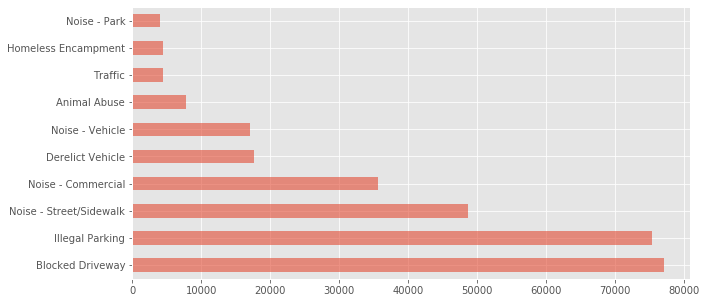

In [181]:
data['Complaint Type'].value_counts().head(10).plot(kind='barh',alpha=0.6,figsize=(10,5));

In [86]:
meanclose1= date_data['Request_Closing_Time'].mean()
meanclose1

-66361400.168607704

In [19]:
from scipy.stats import normaltest
meanclose= date_data['Request_Closing_Time'].mean()
stat, p = normaltest(date_data['Request_Closing_Time'])
meanclose

-5742847521.905661

In [87]:
from scipy.stats import ttest_1samp
tset, pval = ttest_1samp(date_data['Request_Closing_Time'], date_data['Request_Closing_Time'].mean())
pval

1.0

In [94]:
from scipy import stats
from statsmodels.stats import weightstats as stests
ztest ,pval = stests.ztest(date_data['Request_Closing_Time'], x2=None, value=date_data['Request_Closing_Time'].mean())
print(float(pval))

1.0


In [88]:


contingency_table=pd.crosstab(data["Complaint Type"],data["Location Type"])
print('contingency_table :-\n',contingency_table)#Observed Values

Observed_Values = contingency_table.values 
print("Observed Values :-\n",Observed_Values)

b=stats.chi2_contingency(contingency_table)
Expected_Values = b[3]
print("Expected Values :-\n",Expected_Values)

contingency_table :-
 Location Type              Bridge  Club/Bar/Restaurant  Commercial  Ferry  \
Complaint Type                                                              
Animal Abuse                    0                    0          62      0   
Animal in a Park                0                    0           0      0   
Bike/Roller/Skate Chronic       0                    0           0      0   
Blocked Driveway                0                    0           0      0   
Derelict Vehicle                0                    0           0      0   
Disorderly Youth                0                    0           0      0   
Drinking                        0                  366           0      0   
Ferry Complaint                 0                    0           0      1   
Graffiti                        0                    0           0      0   
Homeless Encampment             2                    0           0      0   
Illegal Fireworks               0                    0

In [ ]:
no_of_rows=len(contingency_table.iloc[0:2,0])
print("no_of_rows:-",no_of_rows)
no_of_columns=len(contingency_table.iloc[0,0:2])
print("no_of_columns:-",no_of_columns)
ddof=(no_of_rows-1)*(no_of_columns-1)
print("Degree of Freedom:-",ddof)
alpha = 0.05

In [ ]:

from scipy.stats import chi2
chi_square=sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_Values)])
chi_square_statistic=chi_square[0]+chi_square[1]
print("chi-square statistic:-",chi_square_statistic)


In [ ]:
critical_value=chi2.ppf(q=1-alpha,df=ddof)
print('critical_value:',critical_value)#p-value
p_value=1-chi2.cdf(x=chi_square_statistic,df=ddof)
critical_value=chi2.ppf(q=1-alpha,df=ddof)
print('critical_value:',critical_value)#p-value

p_value=1-chi2.cdf(x=chi_square_statistic,df=ddof)
print('p-value:',p_value)
print('Significance level: ',alpha)
print('Degree of Freedom: ',ddof)
print('chi-square statistic:',chi_square_statistic)
print('critical_value:',critical_value)
print('p-value:',p_value)
if chi_square_statistic>=critical_value:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")
    
if p_value<=alpha:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")

In [ ]:
from scipy.stats import chi2_contingency
chi2_contingency(pd.crosstab(data["Complaint Type"],data["Location Type"]))

In [ ]:


from scipy.stats import chi2_contingency
from scipy.stats import chi2
# contingency table
table=pd.crosstab(data["Complaint Type"],data["Location Type"])
print(table)
stat, p, dof, expected = chi2_contingency(table)
print('dof=%d' % dof)
print(expected)
# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')
# interpret p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')


In [90]:
majorcomplints=data .dropna(subset=["Complaint Type"])
majorcomplints=data .groupby("Complaint Type")

sortedComplaintType = majorcomplints.size().sort_values(ascending = False)
sortedComplaintType = sortedComplaintType.to_frame('count').reset_index()

sortedComplaintType
sortedComplaintType.head(12)

,Complaint Type,count
0,Blocked Driveway,77044
1,Illegal Parking,75361
2,Noise - Street/Sidewalk,48612
3,Noise - Commercial,35577
4,Derelict Vehicle,17718
5,Noise - Vehicle,17083
6,Animal Abuse,7778
7,Traffic,4498
8,Homeless Encampment,4416
9,Noise - Park,4042


In [91]:
data.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location,Request_Closing_Time,Created_Month,Request_Closing_In_Hr,Request_Closing_Time_Category
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:00,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)",0 days 00:55:15,Dec,0.92,Fast
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)",0 days 01:26:16,Dec,1.44,Fast
2,32309159,2015-12-31 23:59:29,2016-01-01 04:51:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)",0 days 04:51:31,Dec,4.86,Slow
3,32305098,2015-12-31 23:57:46,2016-01-01 07:43:00,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)",0 days 07:45:14,Dec,7.75,Very Slow
4,32306529,2015-12-31 23:56:58,2016-01-01 03:24:00,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)",0 days 03:27:02,Dec,3.45,Acceptable


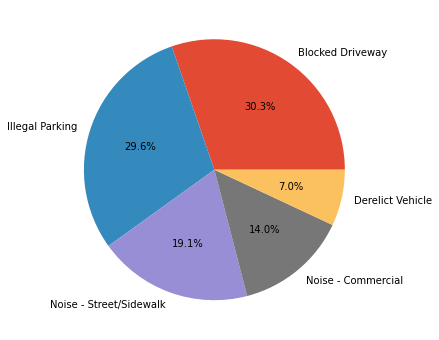

In [92]:
sortedComplaintType = sortedComplaintType.head()
plt.figure(figsize=(6,6))
plt.pie(sortedComplaintType['count'],labels=sortedComplaintType["Complaint Type"], autopct="%1.1f%%")
plt.show()